## NLP Tutorial 4 - SpaCy Introduction for NLP | Linguistic Features Extraction

###### Watch Full Video Here:  https://youtu.be/KOCnVyxVks8

Example 1: "Apple is looking at buying U.K. startup for $1 billion"

Example 2: "Ishu ate the Apple"

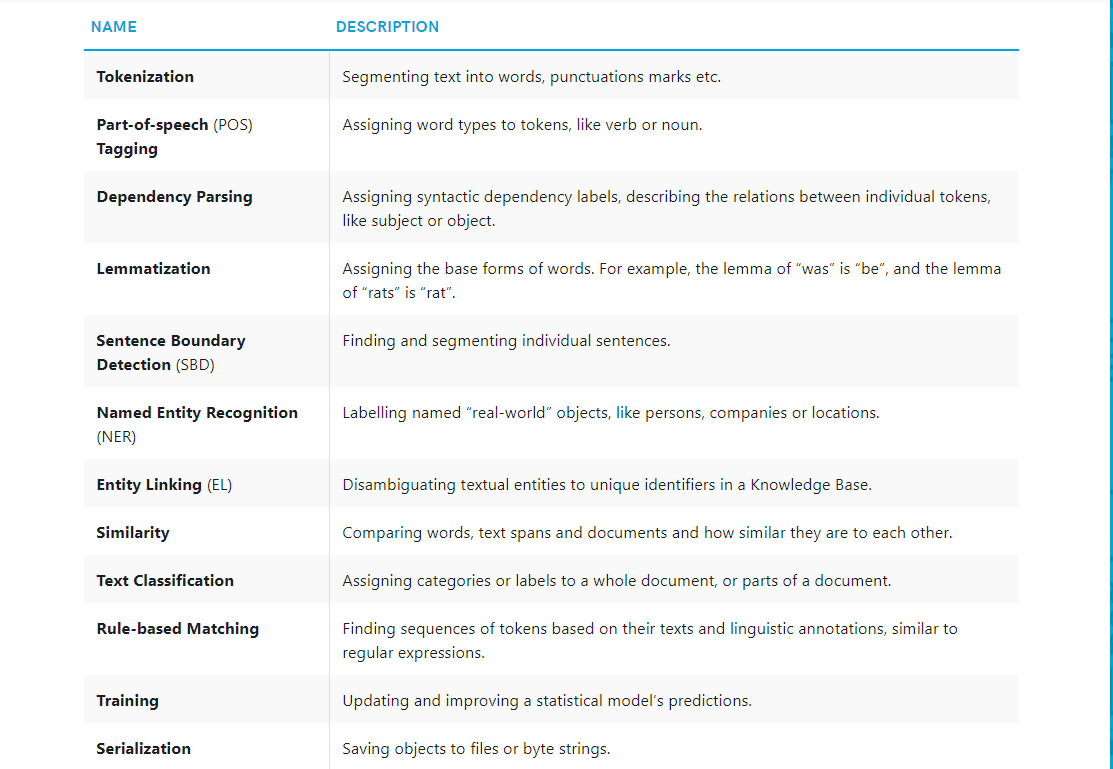

Spacy Models: https://spacy.io/models/en

In [1]:
!pip install -U spacy

Requirement already up-to-date: spacy in c:\programdata\anaconda3\lib\site-packages (2.2.1)


In [ ]:
!pip install -U spacy-lookups-data

In [ ]:
!python -m spacy download en_core_web_sm

Processing raw text intelligently is difficult: most words are rare, and it’s common for words that look completely different to mean almost the same thing. 
```
That’s exactly what spaCy is designed to do: you put in raw text, and get back a Doc object, that comes with a variety of annotations.```

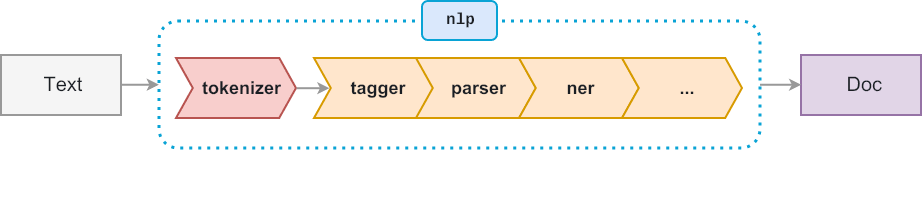

## Tokenization

Tokenization is the task of splitting a text into meaningful segments, called tokens. The input to the tokenizer is a unicode text, and the output is a Doc object. 

In [2]:
import spacy

In [3]:
nlp = spacy.load('en_core_web_sm')

In [6]:
doc = nlp("Apple isn't looking at buyig U.K. startup for $1 billion")

In [7]:
for token in doc:
    print(token.text)

Apple
is
n't
looking
at
buyig
U.K.
startup
for
$
1
billion


### Part-of_Speech [POS] Tagging

In [8]:
doc

Apple isn't looking at buyig U.K. startup for $1 billion

In [9]:
for token in doc:
    print(token.text, token.lemma_)

Apple Apple
is be
n't not
looking look
at at
buyig buyig
U.K. U.K.
startup startup
for for
$ $
1 1
billion billion


In [12]:
for token in doc:
    print(f'{token.text:{15}} {token.lemma_:{15}} {token.pos_:{10}} {token.is_stop}')

Apple           Apple           PROPN      False
is              be              AUX        True
n't             not             PART       True
looking         look            VERB       False
at              at              ADP        True
buyig           buyig           ADJ        False
U.K.            U.K.            PROPN      False
startup         startup         NOUN       False
for             for             ADP        True
$               $               SYM        False
1               1               NUM        False
billion         billion         NUM        False


### Dependency Parsing

In [14]:
for chunk in doc.noun_chunks:
    print(f'{chunk.text:{30}} {chunk.root.text:{15}} {chunk.root.dep_}')

Apple                          Apple           nsubj
buyig U.K. startup             startup         pobj


### Named Entity Recognition 

In [15]:
doc

Apple isn't looking at buyig U.K. startup for $1 billion

In [16]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


### Sentence Segmentation

In [ ]:
#doc.sents

In [17]:
doc

Apple isn't looking at buyig U.K. startup for $1 billion

In [18]:
for sent in doc.sents:
    print(sent)

Apple isn't looking at buyig U.K. startup for $1 billion


In [20]:
doc1 = nlp("Welcome to KGP Talkie. Thanks for watching. Please like and subscribe")

In [22]:
for sent in doc1.sents:
    print(sent)

Welcome to KGP Talkie.
Thanks for watching.
Please like and subscribe


In [33]:
doc1 = nlp("Welcome to.*.KGP Talkie.*.Thanks for watching")

In [34]:
for sent in doc1.sents:
    print(sent)

Welcome to.*.KGP Talkie.*.Thanks for watching


In [47]:
def set_rule(doc):
    for token in doc[:-1]:
        if token.text == '...':
            doc[token.i + 1].is_sent_start = True
    return doc

In [51]:
# nlp.remove_pipe('set_rule')

('set_rule', <function __main__.set_rule(doc)>)

In [52]:
nlp.add_pipe(set_rule, before = 'parser')


In [53]:
text = 'Welcome to KGP Talkie...Thanks...Like and Subscribe!'
doc = nlp(text)

In [54]:
for sent in doc.sents:
    print(sent)

Welcome to KGP Talkie...
Thanks...
Like and Subscribe!


In [46]:
for token in doc:
    print(token.text)

Welcome
to
KGP
Talkie
...
Thanks
...
Like
and
Subscribe
!


### Visualization 

In [55]:
from spacy import displacy

In [56]:
doc

Welcome to KGP Talkie...Thanks...Like and Subscribe!

In [57]:
displacy.render(doc, style='dep')

In [59]:
displacy.render(doc, style='dep', options={'compact':True, 'distance': 100})

In [60]:
doc = nlp("Apple isn't looking at buyig U.K. startup for $1 billion")

In [61]:
displacy.render(doc, style='ent')